<a href="https://colab.research.google.com/github/matheusfsanna/Machine-Learning-classifica-o-com-SKLearn/blob/main/introducao_ao_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
import pandas as pd

# Carregando o dataset

In [7]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

# Explorando dados

In [8]:

len(imagens_treino)
print(f'Formato dos dados de treino: {imagens_treino.shape}')
print(f'Formato dos dados de teste: {imagens_teste.shape}')
print(f'Valor de índice mínimo {identificacoes_treino.min()}')
print(f'Valor de índice máximo {identificacoes_treino.max()}')

Formato dos dados de treino: (60000, 28, 28)
Formato dos dados de teste: (10000, 28, 28)
Valor de índice mínimo 0
Valor de índice máximo 9


# Manipulando e salvando o dataset


# Achatar as imagens

In [9]:
imagens_treino_flat = imagens_treino.reshape(imagens_treino.shape[0], -1)
imagens_teste_flat = imagens_teste.reshape(imagens_teste.shape[0], -1)

# Criando DataFrames do pandas

In [10]:

df_treino = pd.DataFrame(imagens_treino_flat)
df_teste = pd.DataFrame(imagens_teste_flat)

Adicionando colunas de identificação

In [11]:
df_treino['identificacao'] = identificacoes_treino
df_teste['identificacao'] = identificacoes_teste

Salvando DataFrames em arquivos CSV

In [12]:
# Salvar DataFrames em arquivos CSV
df_treino.to_csv('treino.csv', index=False)
df_teste.to_csv('teste.csv', index=False)





# Exploranção visual

Mostrando um item do dataset com graduação de cores

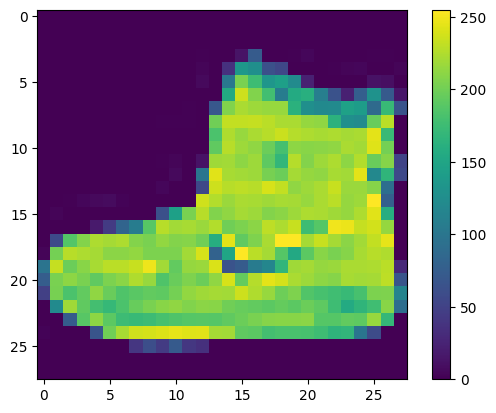

In [13]:
plt.imshow(imagens_treino[0])
plt.colorbar()

Visualizando os itens do dataset com legenda



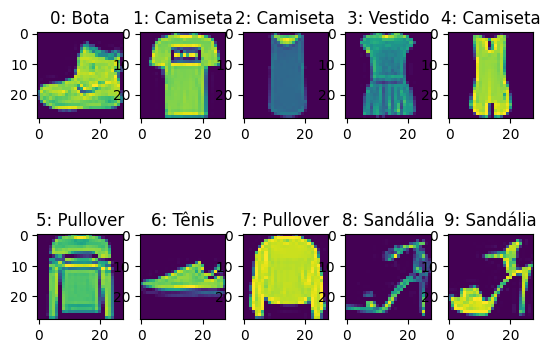

In [14]:

nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover',
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']


for indice, imagem in enumerate(range(10)):
    plt.subplot(2, 5, imagem+1)
    plt.imshow(imagens_treino[imagem])
    plt.title(f'{indice}: {nomes_de_classificacoes[identificacoes_treino[imagem]]}')

plt.show()

# Normatizando os dados

In [15]:
imagens_treino = imagens_treino/float(255)

# Treinando modelo 5x

In [16]:

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5311 - accuracy: 0.8124 - val_loss: 0.4073 - val_accuracy: 0.8566
Epoch 2/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3984 - accuracy: 0.8553 - val_loss: 0.3677 - val_accuracy: 0.8718
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3617 - accuracy: 0.8655 - val_loss: 0.3666 - val_accuracy: 0.8694
Epoch 4/5
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3412 - accuracy: 0.8747 - val_loss: 0.3387 - val_accuracy: 0.8793
Epoch 5/5
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3248 - accuracy: 0.8803 - val_loss: 0.3348 - val_accuracy: 0.8830


# Salvando modelo

In [18]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Usando métricas para analisar o desempenho

In [19]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 55.5073 - accuracy: 0.8528
Perda do teste: 55.50725173950195
Acurácia do teste: 0.8528000116348267


# Exibindo evolução por cada treino

In [20]:
historico.history['accuracy']

[0.812375009059906,
 0.8553125262260437,
 0.8654583096504211,
 0.874708354473114,
 0.8802916407585144]

# Analisando visualmente

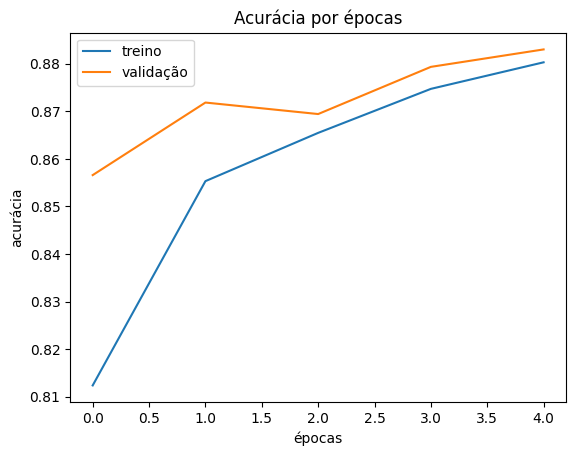

In [21]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


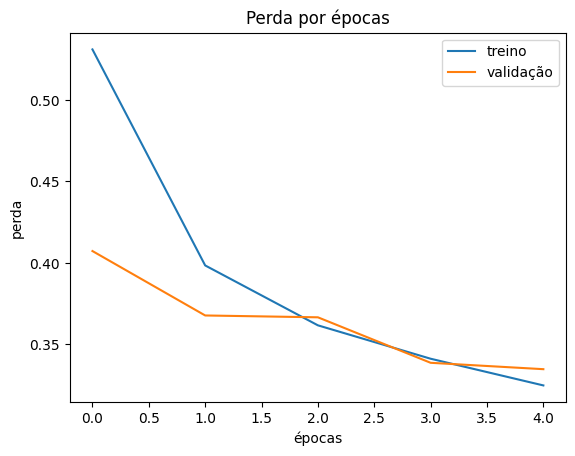

In [22]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

In [23]:
testes = modelo.predict(imagens_teste)

313/313 [==============================] - 1s 3ms/step


Digite o índice da imagem para prever: 200
1/1 [==============================] - 0s 24ms/step
Predição do modelo atual: Calça
Predição do modelo salvo: Calça


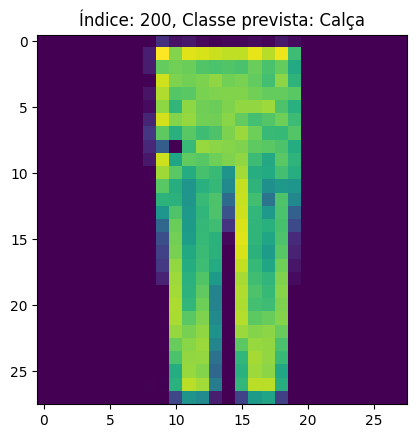

In [34]:
import matplotlib.pyplot as plt

img_index = int(input('Digite o índice da imagem para prever: '))
img = imagens_teste[img_index]

# Prever a imagem usando o modelo atual
predicao = modelo.predict(np.expand_dims(img, axis=0))
classe_predita = np.argmax(predicao)

# Prever a imagem usando o modelo salvo
predicao_modelo_salvo = modelo_salvo.predict(np.expand_dims(img, axis=0))
classe_predita_modelo_salvo = np.argmax(predicao_modelo_salvo)

print(f"Predição do modelo atual: {nomes_de_classificacoes[classe_predita]}")
print(f"Predição do modelo salvo: {nomes_de_classificacoes[classe_predita_modelo_salvo]}")

plt.imshow(img)
plt.title(f'Índice: {img_index}, Classe prevista: {nomes_de_classificacoes[classe_predita]}')
plt.show()
